In [2]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
from math import isnan
from sklearn.calibration import calibration_curve
plt.rcParams['figure.figsize'] = [9, 9]

In [3]:
#ytrue = [.02,.05,.1,.2,.12,.3,.08,.5,.22]
ytrue = [1.,1.,1,1,1,1,0,0,0,0,0]
yprob = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1,0]

In [4]:
ptrue,ppred = calibration_curve(ytrue,yprob)
print(ppred)
print(ptrue)

[0.1  0.35 0.55 0.75 0.95]
[0. 0. 1. 1. 1.]


In [5]:
data_files = glob('data_crop*.nc')
res_files = glob('2014*Z_crs_gauss.nc')
#data_files = ['data_crop_04_15.nc']
#res_files = glob('20140415*Z_crs_gauss.nc')
coordx = [258,260]#,262,264]
coordy = [63,65]#,67,69]
thresh = 0.2
data = build_datadf(data_files,coordx,coordy)
(fr15,fr30,fr45,fr60) = build_brier_fractions(res_files,data.index,data.columns,coordx,coordy,thresh)

index_dates = data.index.date
index_dates_unique = np.unique(index_dates)
index_times = data.index
bs15 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs30 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs45 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs60 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs = [bs15,bs30,bs45,bs60]
fr = [fr15,fr30,fr45,fr60]

for c in data.columns:
    for d in index_dates_unique:
        times = np.array(index_times[np.where(index_dates==d)[0]])
        for f in range(4):
            #number of valid (non NaN) contributions to BS.
            count = 0
            bs_val = 0
            for t in times:
                frac = fr[f].at[t,c]
                sat = data.at[t,c]
                if(sat<thresh):
                    obs = 1.0
                else:
                    obs = 0.0
                val = (frac-obs)**2
                if(not isnan(val)):
                    count += 1
                    bs_val += val
            bs[f].at[d,c] = bs_val/count

print(bs15)

                      0            1
2014-04-02    0.0134722    0.0338889
2014-04-05     0.101667     0.173333
2014-04-09    0.0356944    0.0427778
2014-04-10    0.0028125    0.0040625
2014-04-11     0.156667     0.324167
2014-04-12     0.243333     0.201944
2014-04-15   0.00291667      0.04125
2014-04-18            0            0
2014-04-19     0.214306    0.0451389
2014-04-20  0.000555556  0.000555556
2014-04-21      0.00125      0.00125
2014-04-22   0.00347222   0.00347222
2014-04-25        0.005        0.005
2014-04-26     0.357222     0.239028
2014-05-05   0.00222222   0.00222222
2014-05-06    0.0367647    0.0461765
2014-05-07    0.0189063     0.000625
2014-05-08    0.0301786    0.0701786
2014-05-09    0.0552778    0.0413889
2014-05-19  0.000714286  0.000714286
2014-05-20     0.118906     0.107656
2014-05-21      0.00125      0.00125
2014-05-22   0.00307692   0.00307692
2014-05-23   0.00140625   0.00140625
2014-05-24     0.140882     0.161176
2014-05-25    0.0822222     0.131944
2

In [6]:
print(data)
data_bin = data.mask(data<thresh,other=1)
data_bin = data_bin.mask(data_bin!=1.0,other=0)
print(data_bin)

                            0         1
2014-04-02 16:30:00  0.035458  0.021084
2014-04-02 16:45:00  0.028111  0.030864
2014-04-02 17:00:00  0.025902  0.028544
2014-04-02 17:15:00  0.036538  0.029718
2014-04-02 17:30:00  0.037920  0.038255
2014-04-02 17:45:00  0.064618  0.055072
2014-04-02 18:00:00  0.131268  0.109426
2014-04-02 18:30:00  0.100755  0.112721
2014-04-02 18:45:00  0.128212  0.104692
2014-04-02 19:00:00  0.065097  0.070947
2014-04-02 19:15:00  0.096423  0.093866
2014-04-02 19:30:00  0.138886  0.102686
2014-04-02 19:45:00  0.132562  0.142320
2014-04-02 20:00:00  0.188426  0.182554
2014-04-02 20:15:00  0.121973  0.138402
2014-04-02 20:30:00  0.118844  0.062224
2014-04-02 21:00:00  0.086646  0.082583
2014-04-02 21:30:00  0.080011  0.079279
2014-04-02 21:45:00  0.087090  0.086479
2014-04-02 22:00:00  0.099160  0.126302
2014-04-02 22:15:00  0.072448  0.076457
2014-04-02 22:30:00  0.076665  0.061948
2014-04-05 16:30:00  0.029432  0.032695
2014-04-05 16:45:00  0.022728  0.022373


In [7]:
print(fr15,fr30,fr45,fr60,data_bin)

                        0     1
2014-04-02 16:30:00   NaN   NaN
2014-04-02 16:45:00   0.6   0.6
2014-04-02 17:00:00     1     1
2014-04-02 17:15:00     1     1
2014-04-02 17:30:00     1     1
2014-04-02 17:45:00     1     1
2014-04-02 18:00:00     1     1
2014-04-02 18:30:00   NaN   NaN
2014-04-02 18:45:00     1     1
2014-04-02 19:00:00     1     1
2014-04-02 19:15:00     1     1
2014-04-02 19:30:00   0.9     1
2014-04-02 19:45:00   0.9   0.5
2014-04-02 20:00:00     1   0.6
2014-04-02 20:15:00  0.75   0.8
2014-04-02 20:30:00     1     1
2014-04-02 21:00:00   NaN   NaN
2014-04-02 21:30:00   NaN   NaN
2014-04-02 21:45:00     1     1
2014-04-02 22:00:00     1     1
2014-04-02 22:15:00     1     1
2014-04-02 22:30:00     1     1
2014-04-05 16:30:00   NaN   NaN
2014-04-05 16:45:00   0.8   0.8
2014-04-05 17:00:00     1     1
2014-04-05 17:15:00     1     1
2014-04-05 17:30:00     1     1
2014-04-05 17:45:00     1     1
2014-04-05 18:00:00     1     1
2014-04-05 18:30:00   NaN   NaN
...     

In [8]:
coord = 0
ytrue = data_bin.values[:,coord]
yprob15 = fr15.loc[data_bin.index.values].values[:,coord].astype(np.float)
yprob30 = fr30.loc[data_bin.index.values].values[:,coord].astype(np.float)
yprob45 = fr45.loc[data_bin.index.values].values[:,coord].astype(np.float)
yprob60 = fr60.loc[data_bin.index.values].values[:,coord].astype(np.float)

valid15 = [i for i in range(len(yprob15)) if not np.isnan(yprob15[i])]
valid30 = [i for i in range(len(yprob30)) if not np.isnan(yprob30[i])]
valid45 = [i for i in range(len(yprob45)) if not np.isnan(yprob45[i])]
valid60 = [i for i in range(len(yprob60)) if not np.isnan(yprob60[i])]


#print(ytrue[valid15],yprob15[valid15])
ptrue15,ppred15 = calibration_curve(ytrue[valid15],yprob15[valid15])
ptrue30,ppred30 = calibration_curve(ytrue[valid30],yprob30[valid30])
ptrue45,ppred45 = calibration_curve(ytrue[valid45],yprob45[valid45])
ptrue60,ppred60 = calibration_curve(ytrue[valid60],yprob60[valid60])
print(ptrue15,ppred15)
print(ptrue30,ppred30)
print(ptrue45,ppred45)
print(ptrue60,ppred60)

[0.17346939 0.35       0.76923077 0.82142857 0.96101365] [0.02244898 0.325      0.52692308 0.7625     0.99181287]
[0.18518519 0.37037037 0.52941176 0.83870968 0.94573643] [0.03148148 0.32037037 0.53529412 0.76935484 0.98953488]
[0.15254237 0.5        0.57142857 0.75       0.93303571] [0.03644068 0.345      0.52857143 0.75568182 0.98861607]
[0.13333333 0.47368421 0.57142857 0.725      0.91841492] [0.03555556 0.31578947 0.52142857 0.73625    0.98519814]


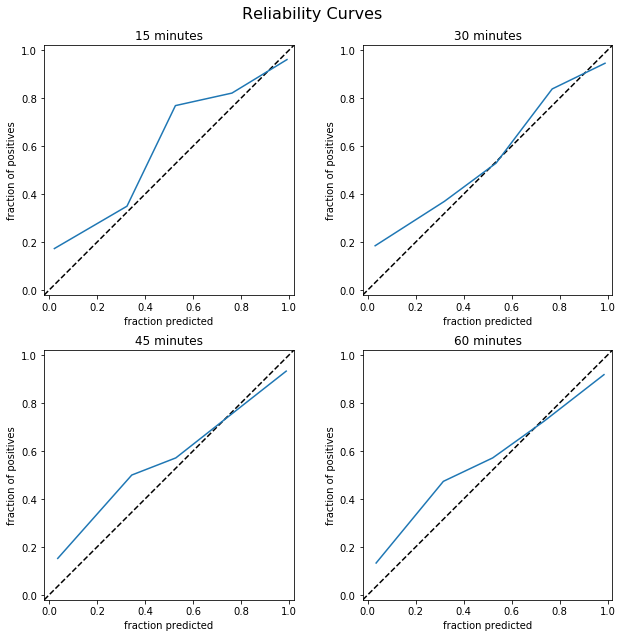

In [9]:
#coord = 0
xmin = -0.02
ymin = xmin
xmax = 1.02
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols)
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',ls='--')
        axarr[r,c].set_xlabel("fraction predicted")
        axarr[r,c].set_ylabel("fraction of positives")

axarr[0,0].plot(ppred15,ptrue15)
axarr[0,1].plot(ppred30,ptrue30)
axarr[1,0].plot(ppred45,ptrue45)
axarr[1,1].plot(ppred60,ptrue60)

axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.tight_layout()
fig.suptitle("Reliability Curves",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

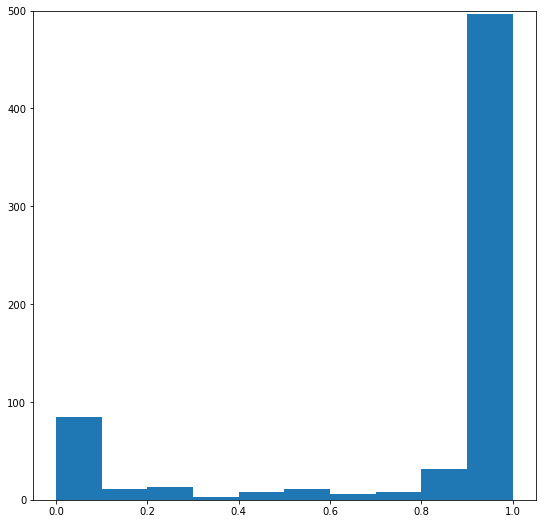

In [17]:
plt.hist(yprob15[valid15])
plt.ylim([0,500])
plt.show()
#print(yprob15[valid15])

See Wilks Ch6 for Forecast model outsput statistics. Consider adding weight to ensemble members for fraction of events true for reliability diagram. P(x<0.2) = 1/sum(weights) * sum(weights times fraction of ens members less than 0.2 at each point). Look for methods of probabilistic forecast tuning???  probabilistic solar weather models? Try just looking at just what old data says for the new outlooks. Just based observed data.

In [18]:
print(ppred15,ptrue15,ppred30,ptrue30,ppred45,ptrue45,ppred60,ptrue60)

[0.02244898 0.325      0.52692308 0.7625     0.99181287] [0.17346939 0.35       0.76923077 0.82142857 0.96101365] [0.03148148 0.32037037 0.53529412 0.76935484 0.98953488] [0.18518519 0.37037037 0.52941176 0.83870968 0.94573643] [0.03644068 0.345      0.52857143 0.75568182 0.98861607] [0.15254237 0.5        0.57142857 0.75       0.93303571] [0.03555556 0.31578947 0.52142857 0.73625    0.98519814] [0.13333333 0.47368421 0.57142857 0.725      0.91841492]
